<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info


**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from scipy import stats

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [67]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [68]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [69]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [70]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [71]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


In [72]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [73]:
y_train.shape


(60000,)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


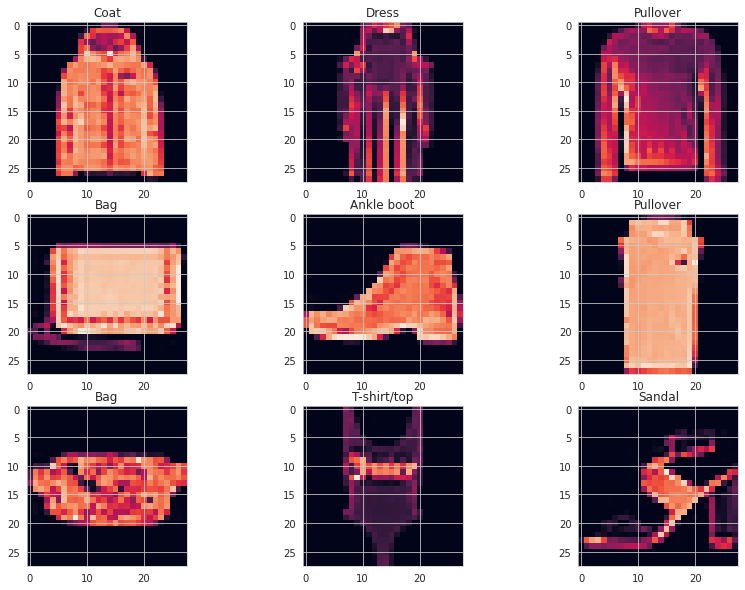

In [74]:
def random_image(X_train,y_train,classes,number=9):
  plt.figure(figsize=(14,10))
  for i in range(number):
    random_number = np.random.choice(X_train.shape[0])
    random_image = X_train[random_number]
    result = classes[y_train[random_number]]
    plt.subplot(3,3,i+1)

    plt.imshow(random_image)
    plt.title(result)
    print(random_image.shape)
random_image(X_train, y_train, classes,9)

# Data Preprocessing

In [75]:
X_train.min(), X_train.max()

(0, 255)

In [76]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train.min(), X_train.max()

(0.0, 1.0)

In [77]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2], 1) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [78]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

# Modeling

## Create the model

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

* compile the model with : loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [119]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)

model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5693 - accuracy: 0.8178 - val_loss: 0.4197 - val_accuracy: 0.8593
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3900 - accuracy: 0.8670 - val_loss: 0.3284 - val_accuracy: 0.8789
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3359 - accuracy: 0.8845 - val_loss: 0.3280 - val_accuracy: 0.8913
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2962 - accuracy: 0.8965 - val_loss: 0.2725 - val_accuracy: 0.9048
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2704 - accuracy: 0.9057 - val_loss: 0.2881 - val_accuracy: 0.9061
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2505 - accuracy: 0.9112 - val_loss: 0.2938 - val_accuracy: 0.9050
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2284 - accuracy: 0.9198 - val_loss: 0.2677 - val_accuracy

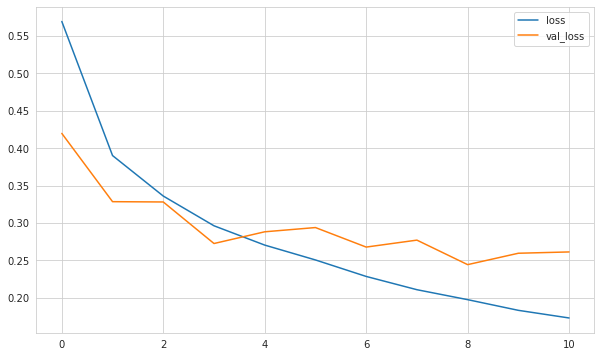

In [120]:
summary = pd.DataFrame(model.history.history)
summary[["loss", "val_loss"]].plot();

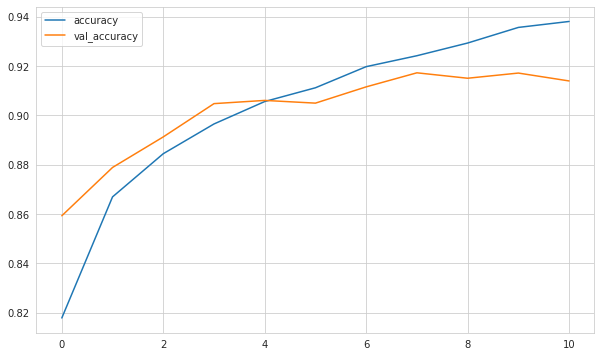

In [121]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

In [122]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27699512243270874
Test accuracy: 0.9172999858856201


In [123]:
pred_prob = model.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.87      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.87      0.86      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.79      0.77      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



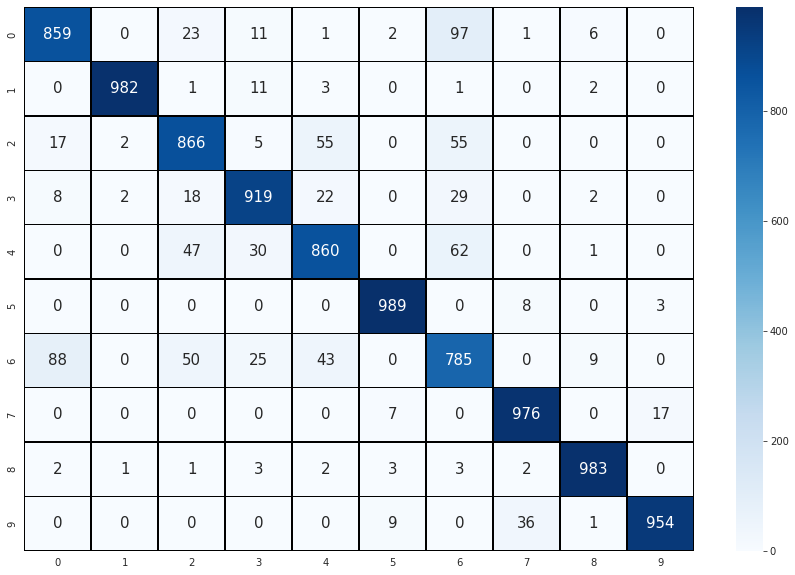

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [125]:
(y_test != y_pred).sum() 

827

## Prediction

Text(0.5, 1.0, 'Dress')

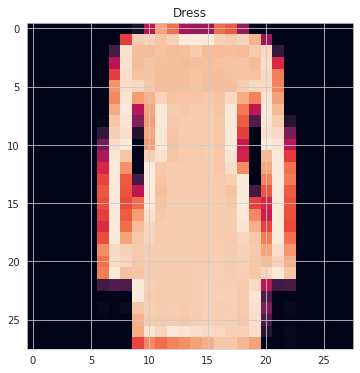

In [126]:
image = X_test[353]
plt.imshow(image.reshape(28,28));
plt.title(classes[y_test[353]])

In [127]:
pred_prob = model.predict(image.reshape(1,28,28,1))
y_pred = np.argmax(pred_prob, axis=1)
classes[int(y_pred)]

'Dress'